In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Data Collection


Mounted at /content/drive


In [2]:
import pandas as pd

cp = pd.read_csv(r"/content/drive/My Drive/Colab/car_price.csv")

In [3]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Data preprocessing

cols=['normalized_losses'  ,'bore', 'stroke' ,'horsepower' ,'peak_rpm' ,'price']

In [5]:
cp[cols] = cp[cols].apply(pd.to_numeric, errors='coerce') # To give null values where the records are '?'

In [6]:
cp.shape

(205, 26)

In [7]:
cp.isnull().sum() / 205 * 100 # To find percentage of null values

symboling             0.00000
normalized_losses    20.00000
Fuel_type             0.00000
make                  0.00000
num_of_doors          0.00000
aspiration            0.00000
wheel_base            0.00000
engine_location       0.00000
drive_wheels          0.00000
body_style            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb_weight           0.00000
engine_type           0.00000
num_of_cylinders      0.00000
engine_size           0.00000
fuel_system           0.00000
bore                  1.95122
stroke                1.95122
compression_ratio     0.00000
horsepower            0.97561
peak_rpm              0.97561
city_mpg              0.00000
highway_mpg           0.00000
price                 1.95122
dtype: float64

In [8]:
# fill null values
cp.normalized_losses.fillna(cp.normalized_losses.mean(), inplace = True)
cp.bore.fillna(cp.bore.mean(), inplace = True)
cp.stroke.fillna(cp.stroke.mean(), inplace = True)
cp.horsepower.fillna(cp.horsepower.mean(), inplace = True)
cp.peak_rpm.fillna(cp.peak_rpm.mean(), inplace = True)
cp.price.fillna(cp.price.mean(), inplace= True)

In [9]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
# Use of label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # To intialize Label Encoder

In [11]:
cp[cp.select_dtypes(include=['object']).columns] = cp[cp.select_dtypes(include=['object']).columns].apply(le.fit_transform) 

In [12]:
# Data Sampling
from sklearn.model_selection import train_test_split

In [13]:
cp_x = cp.iloc[ : , 0:25]
cp_y = cp.iloc[ : , 25]

In [14]:
cp_x_train, cp_x_test, cp_y_train, cp_y_test = train_test_split(cp_x, cp_y, test_size = .2) 

In [15]:
# Train the model
from sklearn.linear_model import LinearRegression

In [16]:
reg_cp = LinearRegression() # initialize the function
reg_cp.fit(cp_x_train, cp_y_train) # train model

pred_train = reg_cp.predict(cp_x_train)
pred_test = reg_cp.predict(cp_x_test)

In [17]:
# Find Rsquare

Rsquare = reg_cp.score(cp_x_train, cp_y_train)
print("Value of Rsquare is: ", Rsquare)

Value of Rsquare is:  0.8991119239211465


In [18]:
#Adjusted Rsquare
#AdjRsquare = 1 - [(1-Rsquare) * (N-1)/ (N-K-1)]

N = cp_x_train.shape[0] # Number of records
K = cp_x_train.shape[1] # Number of X variables

AdjRsquare = 1 - (1-Rsquare) * (N-1)/ (N-K-1)
print("Value of Adjusted Rsquare is: ", AdjRsquare)

Value of Adjusted Rsquare is:  0.8808350985445426


In [19]:
reg_cp.intercept_ # value of Bo

-72095.74686076344

In [20]:
reg_cp.coef_ # value of coefficients

array([ 5.29738866e+02, -2.12513204e+01,  2.43753884e+03,  2.67614769e+03,
       -1.47432617e+03, -1.18718352e+03,  1.76416394e+03,  1.30619055e+04,
        1.04829332e+02, -2.20475107e+02,  4.62897327e+01,  5.00571750e+02,
        3.20229898e+02,  3.33142661e+00,  3.47737737e+02,  7.57888285e+02,
        1.19971832e+02,  2.87673861e+02, -2.42799071e+03, -3.00161146e+03,
        9.45776789e+01, -3.93858389e+01,  2.45966953e+00,  1.42656679e+02,
       -3.70245120e+01])

In [21]:
pred_train_cp = reg_cp.predict(cp_x_train) 
pred_test_cp = reg_cp.predict(cp_x_test) 

In [22]:
# Find Error
error_train_cp = cp_y_train - pred_train_cp

In [23]:
# Find MSE
import numpy as np
error_test_cp = cp_y_test - pred_test_cp

MSE = np.mean(np.square(error_test_cp))
print("Value of MSE is:", MSE)

Value of MSE is: 14137821.178900309


In [24]:
# Find RMSE
RMSE = np.sqrt(MSE)
print("Value of RMSE is:", RMSE)

Value of RMSE is: 3760.029411972772


In [25]:
# Find MAPE
MAPE = np.mean(np.abs(error_test_cp / cp_y_test * 100))
print("Value of MAPE is: ", MAPE)

Value of MAPE is:  18.81711915255909


In [26]:
# Find Accuracy
accuracy = 100 - MAPE
print("Accuracy of the model is", accuracy, "%.")

Accuracy of the model is 81.18288084744091 %.


In [27]:
# check diffrence between actucal and predicted values

pred_actual_train = pd.DataFrame({"Actual" : cp_y_train , "Predicted" : pred_train_cp})

pred_actual_train.head()

,Actual,Predicted
150,5348.0,5703.442204
81,8499.0,8092.793268
14,24565.0,22716.996647
48,35550.0,31365.341479
156,6938.0,5393.163388


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


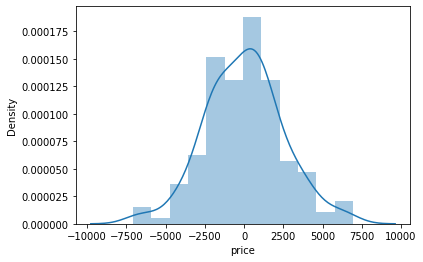

In [28]:
# Histogram
import seaborn as sns

sns.distplot(error_train_cp)

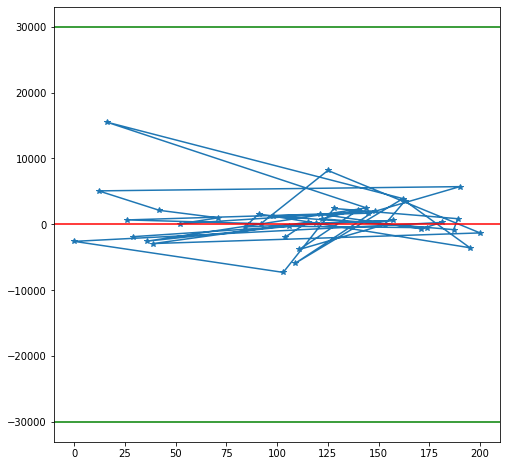

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,8))
plt.plot(error_test_cp, marker = '*')
plt.axhline(y = np.mean(error_train_cp) , color = "r") 
plt.axhline(y = 30000 , color = "g") 
plt.axhline(y = -30000 , color = "g")
 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


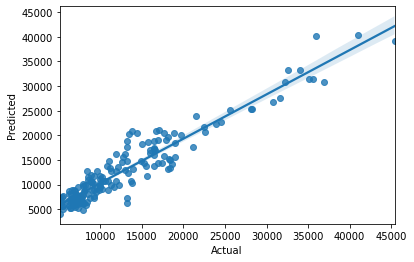

In [30]:
# Regression by scattered plot
sns.regplot(pred_actual_train.Actual , pred_actual_train.Predicted)